In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from google.colab import files

In [2]:
uploaded = files.upload()
dataset = pd.read_csv("./housing_dataset.csv")
dataset.head()

Saving housing_dataset.csv to housing_dataset (1).csv


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [3]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = dataset['Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,random_state=21)

In [6]:
model = Sequential()
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model.fit(X_train, y_train,validation_split=0.30, batch_size = 10, epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
Total params: 296,960
Trainable params: 296,960
Non-trainable params: 0
__________________________________________________

In [7]:
predictions = model.predict(X_test)

ValueError: ignored

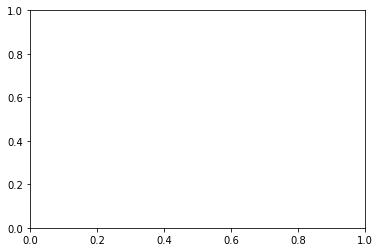

In [10]:
plt.scatter(y_test,predictions)